In [1]:
import os

os.getcwd()

'/home/javier/Escritorio/Uni/4º/q2/CDI/lab1'

In [2]:
import sys
!{sys.executable} -m pip install unidecode

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from unidecode import unidecode

In [4]:
with open('./textos/buddenbrooks.txt', 'r') as file:
    text_al = file.read()
with open('./textos/buxareu.txt', 'r') as file:
    text_cat = file.read()
with open('./textos/copperfield.txt', 'r') as file:
    text_en = file.read()
with open('./textos/miserables.txt', 'r') as file:
    text_fr = file.read()
with open('./textos/orlando.txt', 'r') as file:
    text_it = file.read()
with open('./textos/quijote.txt', 'r') as file:
    text_cas = file.read()

In [5]:
text_al[:1000]

"\ufeffTHOMAS MANN\n\n                              Buddenbrooks\n\n                                Verfall\n                                 einer\n                                Familie\n\n\n                       DEUTSCHE BUCH-GEMEINSCHAFT\n                                  GMBH\n\n                                 Berlin\n\n\n\n\n             Mit Genehmigung von S. Fischer Verlag, Berlin\n\n              Copyright 1909 by S. Fischer Verlag, Berlin\n\n                        Alle Rechte vorbehalten\n\n\n\n\n                              Buddenbrooks\n\n\n\n\nErster Teil\n\n\nErstes Kapitel\n\nWas ist das. -- Was -- ist das\xa0...\n\nJe, den Düwel ook, _c'est la question, ma très chère demoiselle_!\n\nDie Konsulin Buddenbrook, neben ihrer Schwiegermutter auf dem\ngeradlinigen, weiß lackierten und mit einem goldenen Löwenkopf\nverzierten Sofa, dessen Polster hellgelb überzogen waren, warf einen\nBlick auf ihren Gatten, der in einem Armsessel bei ihr saß, und kam\nihrer kleinen Tochter

Hacer diferentes compresiones y poner los parámetros más efectivos.

**Simplificació de l'alfabet.**

In [6]:
def clean_text(txt):
    clean = ''.join(x for x in txt if x.isalpha() or x.isspace()) #deja solo letras y espacios
    clean = clean.lower() #en minúsculas
    clean = unidecode(clean) #quita acentos
    clean = ' '.join(clean.split()) #solo un espacio
    return clean

In [7]:
#textos resultants aplicant la funció
clean_text_al = clean_text(text_al)
clean_text_cat = clean_text(text_cat)
clean_text_en = clean_text(text_en)
clean_text_fr = clean_text(text_fr)
clean_text_it = clean_text(text_it)
clean_text_cas = clean_text(text_cas)

In [8]:
#obrim les versions simplificades donades per comprovar el resultat
with open('./textos/buddenbrooks_clean.txt', 'r') as file:
    text_al_ex = file.read()
with open('./textos/buxareu_clean.txt', 'r') as file:
    text_cat_ex = file.read()
with open('./textos/copperfield_clean.txt', 'r') as file:
    text_en_ex = file.read()
with open('./textos/miserables_clean.txt', 'r') as file:
    text_fr_ex = file.read()
with open('./textos/orlando_clean.txt', 'r') as file:
    text_it_ex = file.read()
with open('./textos/quijote_clean.txt', 'r') as file:
    text_cas_ex = file.read()

In [9]:
clean_text_al == text_al_ex

False

Com podem veure, el text que retorna la funció no és idèntic a les versions simplificades donades amb l'exercici, anem a comprovar si es tracta d'una diferència notable o negligible

In [10]:
len(clean_text_al)

1446856

In [11]:
len(text_al_ex)

1446842

Com podem comprovar, la diferència és només de 14 caràcters. Els quals, segurament, siguin espais en blanc

In [12]:
clean_text_al.count(' ')

228210

In [13]:
text_al_ex.count(' ')

228196

Efectivament es tracta de 14 espais en blanc extra, per tant podem concluir en que els textos son quasi idèntics.

**Longituds de les paraules**

In [14]:
from statistics import mean

In [15]:
def avg_len(txt):
    words = txt.split()
    lens = [len(x) for x in words]
    return mean(lens)

In [16]:
avg_len_al = avg_len(clean_text_al)
avg_len_cat = avg_len(clean_text_cat)
avg_len_en = avg_len(clean_text_en)
avg_len_fr = avg_len(clean_text_fr)
avg_len_it = avg_len(clean_text_it)
avg_len_cas = avg_len(clean_text_cas)

In [17]:
print("Longituds mitjanes de les paraules en alemany: ", avg_len_al)
print("Longituds mitjanes de les paraules en català: ", avg_len_cat)
print("Longituds mitjanes de les paraules en anglès: ", avg_len_en)
print("Longituds mitjanes de les paraules en francès: ", avg_len_fr)
print("Longituds mitjanes de les paraules en italià: ", avg_len_it)
print("Longituds mitjanes de les paraules en castellà: ", avg_len_cas)

Longituds mitjanes de les paraules en alemany:  5.339996757386804
Longituds mitjanes de les paraules en català:  4.444539176400375
Longituds mitjanes de les paraules en anglès:  4.170232977688827
Longituds mitjanes de les paraules en francès:  4.7188738224406865
Longituds mitjanes de les paraules en italià:  4.292121189339548
Longituds mitjanes de les paraules en castellà:  4.303755430106398


Com podem apreciar, la llengua amb paraules més curtes és l'anglès, i la llengua amb paraules més llarges és, notablement, l'alemany.

**Estadístiques de lletres**

In [18]:
def source_fromtext(txt):
    x = []
    for l in set(txt):
        n = txt.count(l)
        x.append((l,n))
    return x

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def histogram(txt):
    data = source_fromtext(txt)
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    fig = plt.figure(figsize = (10,5))
    plt.bar(x,y,color='blue', width=0.4)
    plt.xlabel("Lletres del text")
    plt.ylabel("Nombre d'ocurrències")
    plt.show()

Histograma del text en alemany: 


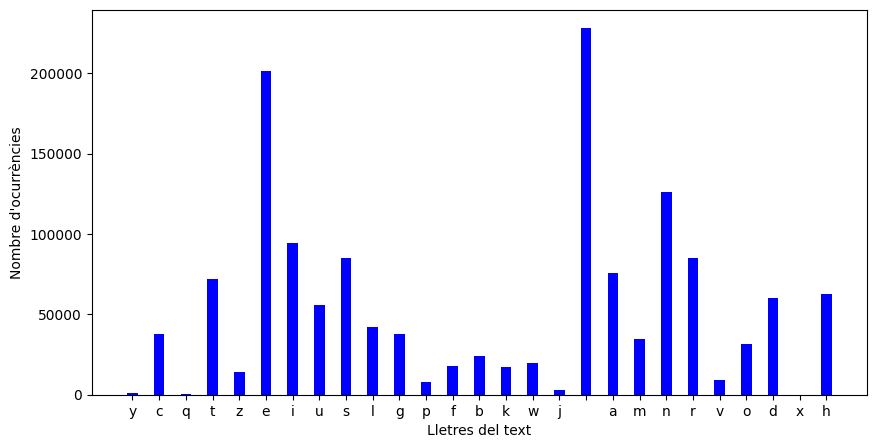

Histograma del text en català: 


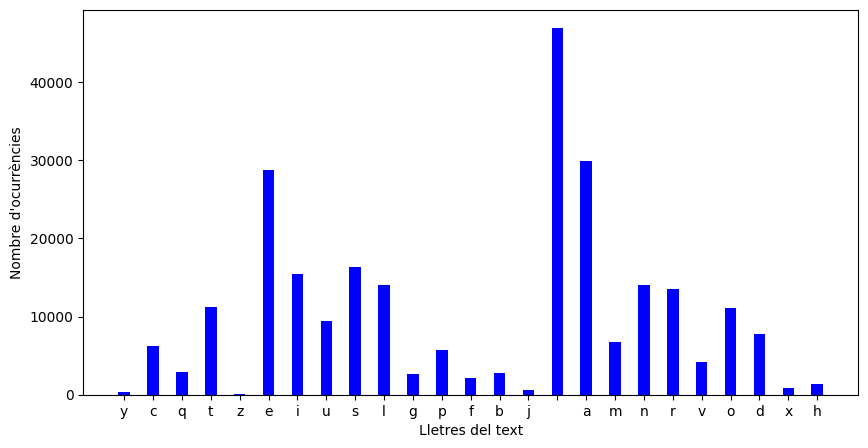

Histograma del text en anglès: 


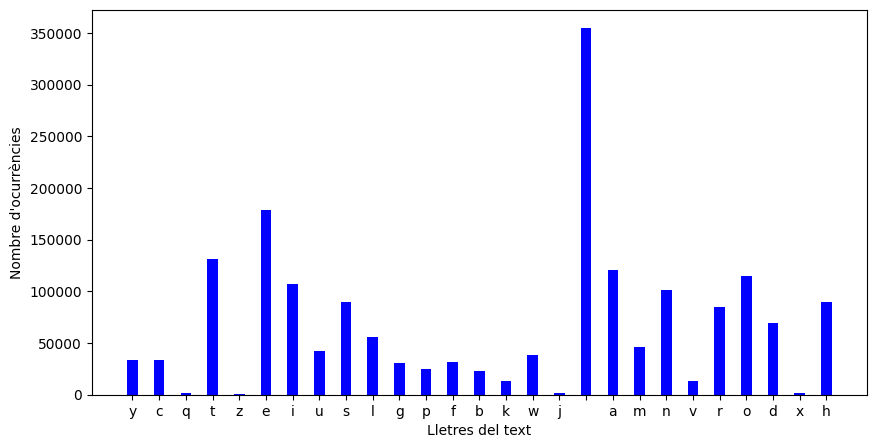

Histograma del text en francès: 


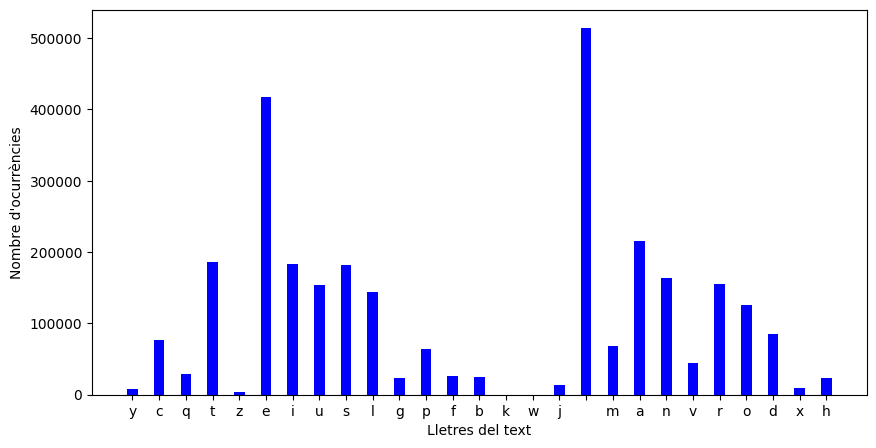

Histograma del text en italià: 


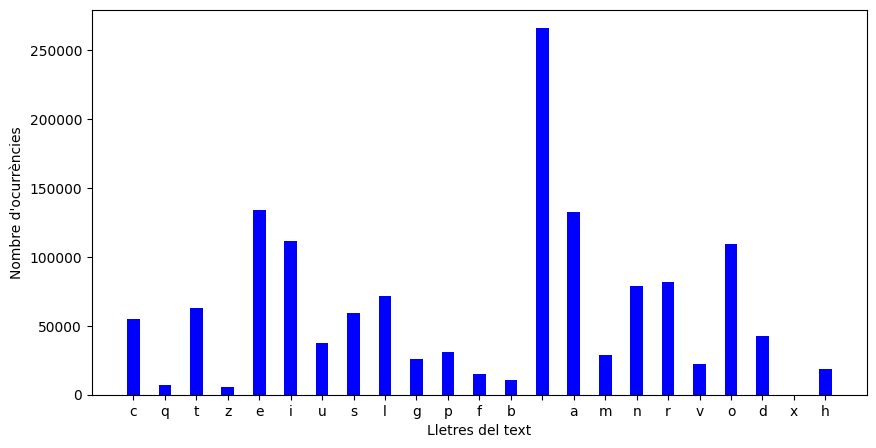

Histograma del text en castellà: 


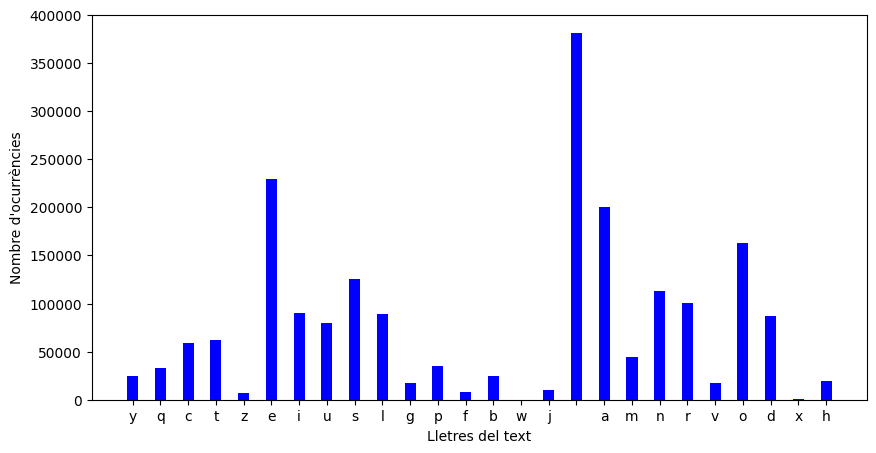

In [21]:
print("Histograma del text en alemany: ")
histogram(clean_text_al)
print("Histograma del text en català: ")
histogram(clean_text_cat)
print("Histograma del text en anglès: ")
histogram(clean_text_en)
print("Histograma del text en francès: ")
histogram(clean_text_fr)
print("Histograma del text en italià: ")
histogram(clean_text_it)
print("Histograma del text en castellà: ")
histogram(clean_text_cas)

*Proposeu una mètrica per comparar llengües diferents (vegeu distància de Hellinger)*

**Text aleatori**

In [22]:
def random_text(txt,n):
    #cogemos la probabilidad de letras de txt y hacemos una palabra de n letras con las
    #probabilidades de txt
    source = source_fromtext(txt)
    letters = [x[0] for x in source]
    total_occur = sum([x[1] for x in source])#número total de letras en el texto
    probs = []
    for x in source:
        prob = x[1]/total_occur
        probs.append(prob)
    result_str = ''.join(np.random.choice(letters, n, p=probs))
    return(result_str)

In [23]:
x = "aaaaaaaaabbbbbbbbcddddddddddddddddddddddddd"
random_text(x,7)

'dadddad'

**Text aleatori amb context**

In [67]:
def random_text_Markov(txt,k,n):
    source = {}#dict
    for i in range(0,len(txt)):
        chain = ""
        for j in range(k,0,-1):
            chain += txt[i-j]
        chain += txt[i]
        if chain in source:
            source[chain] += 1
        else:
            source[chain] = 1
#     ahora tenemos keys = cadena de letras, values = sus apariciones, si sumamos values podremos
#     calcular las probabilidades
    total_occur = sum(source.values())
    for x in source:
        source[x] /= total_occur
    probs = list(source.values())
    letters = list(source.keys())
    result_str = ''.join(np.random.choice(letters,n,p=probs))
    return(result_str)

In [78]:
txt = "Setze jutges d'un jutjat mengen fetge d'un penjat."
k = 5
x = random_text_Markov(txt,k,round(len(txt)/(k+1)))
print(x)

jutjat d'un  penjajat meat.Setes d'uutges Setze 
